In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from cv2 import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
val_path=r"C:\\Users\\User\\Downloads\\deteksi sayuran\\validation"
train_path=r"C:\\Users\User\\Downloads\\deteksi sayuran\\train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 198 files belonging to 4 classes.
Found 40 files belonging to 4 classes.


In [3]:
class_names = train_dataset.class_names
print(len(class_names))

4


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))

In [5]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [6]:
history = model.fit(x=train_dataset,
                    epochs= 20,
                    validation_data=val_dataset)

Epoch 1/20
7/7 [==============================] - 27s 3s/step - loss: 1.3188 - accuracy: 0.4899 - val_loss: 6.5474 - val_accuracy: 0.2750
Epoch 2/20
7/7 [==============================] - 19s 2s/step - loss: 0.6719 - accuracy: 0.7525 - val_loss: 4.0823 - val_accuracy: 0.3750
Epoch 3/20
7/7 [==============================] - 18s 2s/step - loss: 0.4076 - accuracy: 0.8535 - val_loss: 3.6414 - val_accuracy: 0.2750
Epoch 4/20
7/7 [==============================] - 20s 3s/step - loss: 0.2890 - accuracy: 0.9192 - val_loss: 2.9539 - val_accuracy: 0.3500
Epoch 5/20
7/7 [==============================] - 19s 2s/step - loss: 0.2203 - accuracy: 0.9495 - val_loss: 1.5152 - val_accuracy: 0.4250
Epoch 6/20
7/7 [==============================] - 16s 2s/step - loss: 0.2271 - accuracy: 0.9293 - val_loss: 2.2901 - val_accuracy: 0.3000
Epoch 7/20
7/7 [==============================] - 18s 2s/step - loss: 0.1263 - accuracy: 0.9596 - val_loss: 1.5786 - val_accuracy: 0.4000
Epoch 8/20
7/7 [==================

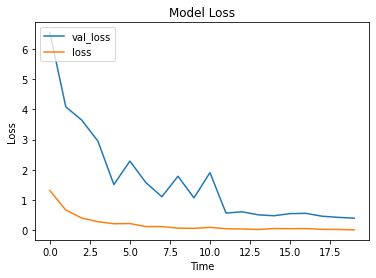

In [7]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

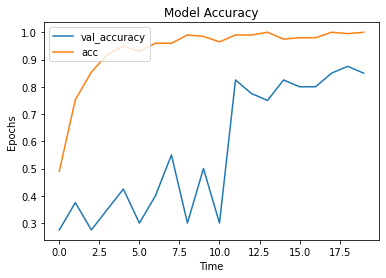

In [8]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

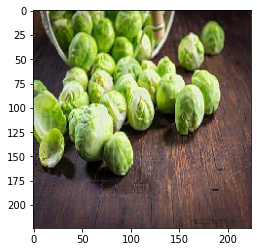

1/1 [==============================] - 0s 321ms/step


IndexError: list index out of range

In [9]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\deteksi sayuran\\test\\Brussel sprouts\\Image_2.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

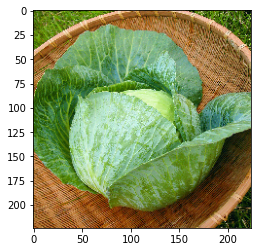

1/1 [==============================] - 0s 49ms/step


IndexError: list index out of range

In [14]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\deteksi sayuran\\test\\Kubis\\Image_1.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

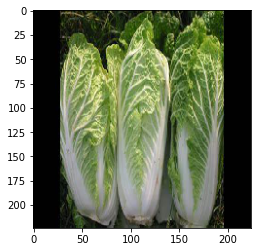

1/1 [==============================] - 0s 55ms/step


IndexError: list index out of range

In [11]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\deteksi sayuran\\test\\Napa cabbage\\Image_6.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

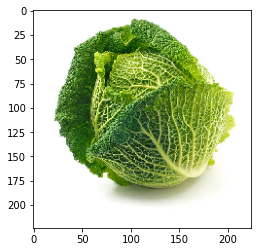

1/1 [==============================] - 0s 54ms/step


IndexError: list index out of range

In [12]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\deteksi sayuran\\test\\Savoy cabbage\\Image_2.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])